In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import fsolve
from scipy.optimize import root
from scipy.integrate import solve_ivp
import math
from scipy.optimize import newton

# Funciones $f(T)$ y $g(E)$

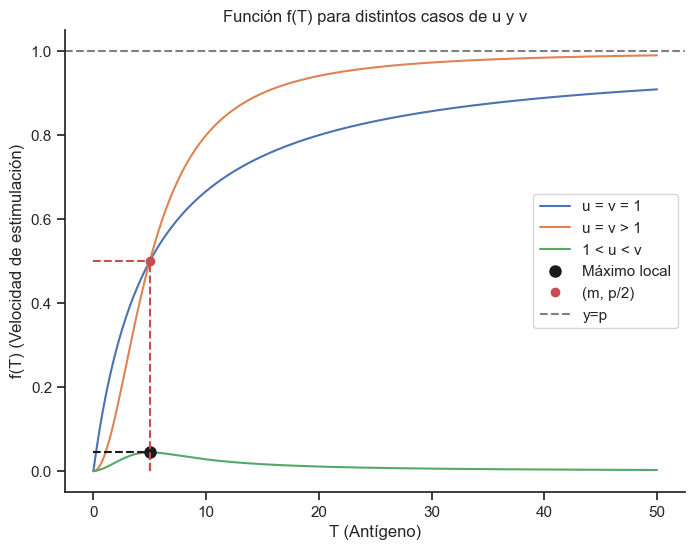

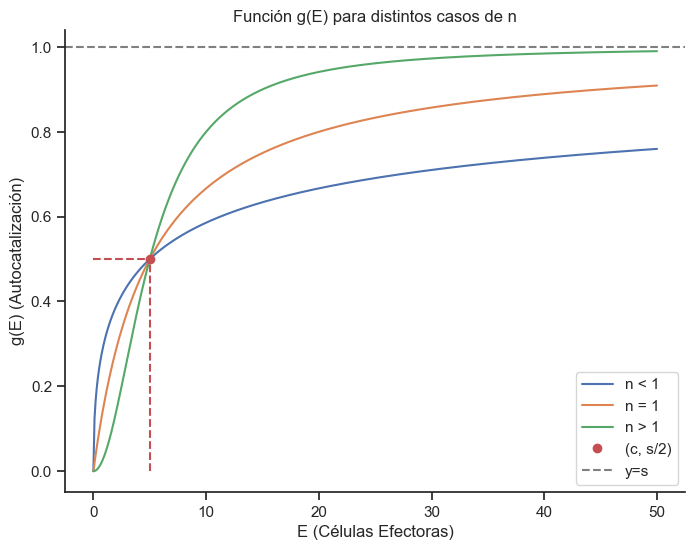

In [2]:
sns.set(style='ticks')

# Definir la función f(T) = p * T^u / (m^v + T^v)
def f_T(T, p, u, v, m):
    return p * (T**u) / (m**v + T**v)

# Definir la función g(E) = s * E^n / (C^n + E^n)
def g_E(E, s, n, C):
    return s * (E**n) / (C**n + E**n)

# Rango de valores para T y E
T_values = np.linspace(0, 50, 500)
E_values = np.linspace(0, 50, 500)

# Parámetros para f(T)
p = 1
m = 5
# Casos para f(T):
# (a) u = v = 1; (b) u = v > 1; (c) 1 < u < v
cases_fT = [
    {"u": 1,   "v": 1, "label": "u = v = 1"},
    {"u": 2,   "v": 2, "label": "u = v > 1"},
    {"u": 1.5, "v": 3, "label": "1 < u < v"}
]

# Parámetros para g(E)
s = 1
C = 5
# Casos para g(E):
# (a) n < 1; (b) n = 1; (c) n > 1
cases_gE = [
    {"n": 0.5, "label": "n < 1"},
    {"n": 1,   "label": "n = 1"},
    {"n": 2,   "label": "n > 1"}
]

# Graficar f(T)
fig, ax = plt.subplots(figsize=(8, 6))
for case in cases_fT:
    ax.plot(T_values, f_T(T_values, p, case["u"], case["v"], m), label=case["label"])
    
    # Si es el caso 1 < u < v, calcular y marcar el máximo local
    if case["u"] == 1.5 and case["v"] == 3:
        T_dense = np.linspace(0, 10, 1000)
        f_dense = f_T(T_dense, p, case["u"], case["v"], m)
        max_index = np.argmax(f_dense)
        T_max = T_dense[max_index]
        f_max = f_dense[max_index]
        ax.plot(T_max, f_max, 'ko', markersize=8, label="Máximo local")
        # Dibujar segmentos punteados desde el máximo a los ejes
        ax.plot([T_max, T_max], [0, f_max], 'k--')
        ax.plot([0, T_max], [f_max, f_max], 'k--')

# Dibujar el punto (m, p/2)
ax.plot(m, p/2, 'ro',label="(m, p/2)")
# Dibujar la recta horizontal punteada en y = p
ax.axhline(y=p, color='gray', linestyle='--', label="y=p")
# Dibujar segmentos punteados que unan (m, p/2) con los ejes
ax.plot([m, m], [0, p/2], 'r--')
ax.plot([0, m], [p/2, p/2], 'r--')

ax.set_title("Función f(T) para distintos casos de u y v")
ax.set_xlabel("T (Antígeno)")
ax.set_ylabel("f(T) (Velocidad de estimulación)")
ax.legend()
sns.despine(ax=ax, offset=0)
plt.show()

# Graficar g(E)
fig, ax = plt.subplots(figsize=(8, 6))
for case in cases_gE:
    ax.plot(E_values, g_E(E_values, s, case["n"], C), label=case["label"])

# Dibujar el punto (C, s/2)
ax.plot(C, s/2, 'ro',label="(c, s/2)")
# Dibujar segmentos punteados que unan (C, s/2) con los ejes
ax.plot([C, C], [0, s/2], 'r--')
ax.plot([0, C], [s/2, s/2], 'r--')
ax.axhline(y=s, color='gray', linestyle='--', label="y=s")

ax.set_title("Función g(E) para distintos casos de n")
ax.set_xlabel("E (Células Efectoras)")
ax.set_ylabel("g(E) (Autocatalización)")
ax.legend()
sns.despine(ax=ax, offset=0)
plt.show()

# Aproximación Númerica a los Puntos de Equilibrio

## Puntos $P_M=(0,E_m)$
Estos puntos estan dados por la ecuación $1=\frac{sE^{n-1}}{1+E^n}$

In [3]:
def equation(E, s, n):
    return (s * E**(n-1) / (1 + E**n)) - 1

def find_solutions(s, n, E_guess=1.0):
    try:
        E_positive = fsolve(equation, E_guess, args=(s, n))
        E_negative = fsolve(equation, -E_guess, args=(s, n))

        positive_solution = E_positive[0] if equation(E_positive[0], s, n) < 1e-6 and E_positive[0] > 0 else None
        negative_solution = E_negative[0] if equation(E_negative[0], s, n) < 1e-6 and E_negative[0] < 0 else None

        return positive_solution, negative_solution
    except:
        return None, None

def count_solutions(s_values, n_values):
    positive_count = 0
    negative_count = 0
    no_solution_count = 0

    for s in s_values:
        for n in n_values:
            pos_sol, neg_sol = find_solutions(s, n)
            if pos_sol is not None:
                positive_count += 1
            elif neg_sol is not None:
                negative_count += 1
            else:
                no_solution_count += 1

    return positive_count, negative_count, no_solution_count

# Definir rangos de parámetros
s_range = np.linspace(0.05, 20, 300)
n_range = np.linspace(1.05, 10, 300)
positive_count, negative_count, no_solution_count = count_solutions(s_range, n_range)

# Mostrar resultados
print(f"Número de soluciones positivas: {positive_count}")
print(f"Número de soluciones negativas: {negative_count}")
print(f"Número de casos sin solución: {no_solution_count}")

Número de soluciones positivas: 76495
Número de soluciones negativas: 0
Número de casos sin solución: 13505


/var/folders/kp/6z23sv5s1cb7rkrzzzslh1qc0000gn/T/ipykernel_11575/2025886970.py:2: RuntimeWarning: invalid value encountered in power
  return (s * E**(n-1) / (1 + E**n)) - 1
/var/folders/kp/6z23sv5s1cb7rkrzzzslh1qc0000gn/T/ipykernel_11575/2025886970.py:6: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  E_positive = fsolve(equation, E_guess, args=(s, n))
/var/folders/kp/6z23sv5s1cb7rkrzzzslh1qc0000gn/T/ipykernel_11575/2025886970.py:7: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  E_negative = fsolve(equation, -E_guess, args=(s, n))
/var/folders/kp/6z23sv5s1cb7rkrzzzslh1qc0000gn/T/ipykernel_11575/2025886970.py:2: RuntimeWarning: invalid value encountered in scalar power
  return (s * E**(n-1) / (1 + E**n)) - 1
/var/folders/kp/6z23sv5s1cb7rkrzzzslh1qc0000gn/T/ipykernel_11575/2025886970.py:7: RuntimeWarning: The iteration is not making go

Se considera que la solución es válida si la función equation evaluada en la solución es casi cero (con una tolerancia de 1 $\times 10^{-6}$) y la solución es positiva.

### Número de Soluciónes por Regiones 

Las siguientes regiones se obtuvieron algebraicamente.

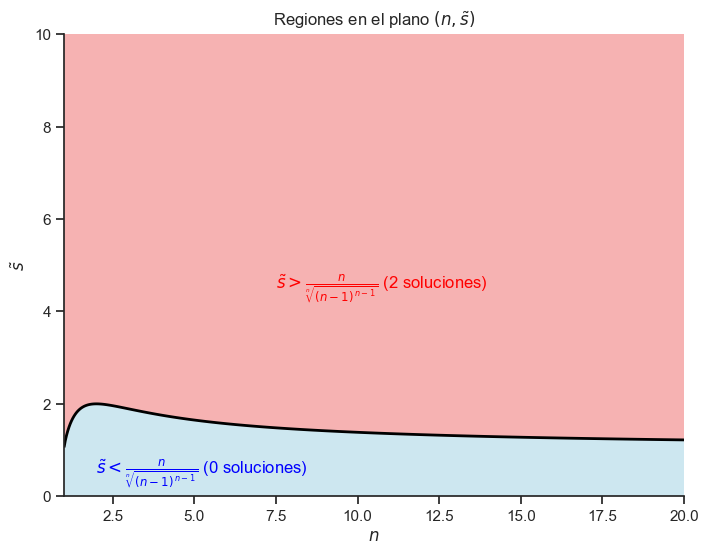

In [4]:
sns.set(style='ticks')

# Definir la función f(n) = n / ((n-1)^((n-1)/n))
def f(n):
    return n / ((n - 1)**((n - 1) / n))

# Definir los rangos para n y s (usaremos s en lugar de \tilde{s})
n_vals = np.linspace(1.01, 20, 500)  # n > 1
s_vals = np.linspace(0, 10, 500)      # s abarca desde 0 hasta algo mayor al máximo de f(n) (que es 2 para n=2)

# Crear la malla
N, S = np.meshgrid(n_vals, s_vals)

# La curva f(n) se evalúa sólo en función de n:
F = f(N)  # dado que N es la malla de n

# Definir la diferencia: diff = s - f(n)
diff = S - F

# Crear la gráfica de regiones con colores:
plt.figure(figsize=(8, 6))
# Usamos dos niveles para separar: diff < 0 y diff > 0.
# Definimos niveles en, por ejemplo, -10, 0 y 10.
levels = [-10, 0, 20]
# region1 (s < f(n)) : diff < 0  (2 soluciones) y region2 (s > f(n)) : diff > 0 (0 soluciones)
contour = plt.contourf(N, S, diff, levels=levels, colors=['lightblue', 'lightcoral'], alpha=0.6)

# Dibujar la curva (nivel 0)
contour_line = plt.contour(N, S, diff, levels=[0], colors='black', linewidths=2)

plt.xlabel(r'$n$')
plt.ylabel(r'$\tilde{s}$')
plt.title(r'Regiones en el plano $(n,\tilde{s})$')
#plt.xlim([1, 10])
#plt.ylim([0, 2.5])
sns.despine(offset=0)
#plt.colorbar(contour, ticks=[-5, 5], label=r'$S - f(n)$')  # Opcional: barra de color

# Agregar anotaciones para las regiones (opcional)
plt.text(2, 0.5, r'$\tilde{s} < \frac{n}{\sqrt[n]{(n-1)^{\,n-1}}}$ (0 soluciones)', color='blue')
plt.text(7.5, 4.5, r'$\tilde{s} > \frac{n}{\sqrt[n]{(n-1)^{\,n-1}}}$ (2 soluciones)', color='red')

plt.show()

### Aproximación de las regiones

Primero dividimos en las regiones de existencia 

/var/folders/kp/6z23sv5s1cb7rkrzzzslh1qc0000gn/T/ipykernel_11575/1047855795.py:4: RuntimeWarning: invalid value encountered in power
  return (s * E**(n-1) / (1 + E**n)) - 1
/var/folders/kp/6z23sv5s1cb7rkrzzzslh1qc0000gn/T/ipykernel_11575/1047855795.py:17: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  sol = fsolve(equation, guess, args=(s, n))
/var/folders/kp/6z23sv5s1cb7rkrzzzslh1qc0000gn/T/ipykernel_11575/1047855795.py:4: RuntimeWarning: invalid value encountered in scalar power
  return (s * E**(n-1) / (1 + E**n)) - 1
/var/folders/kp/6z23sv5s1cb7rkrzzzslh1qc0000gn/T/ipykernel_11575/1047855795.py:17: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last five Jacobian evaluations.
  sol = fsolve(equation, guess, args=(s, n))


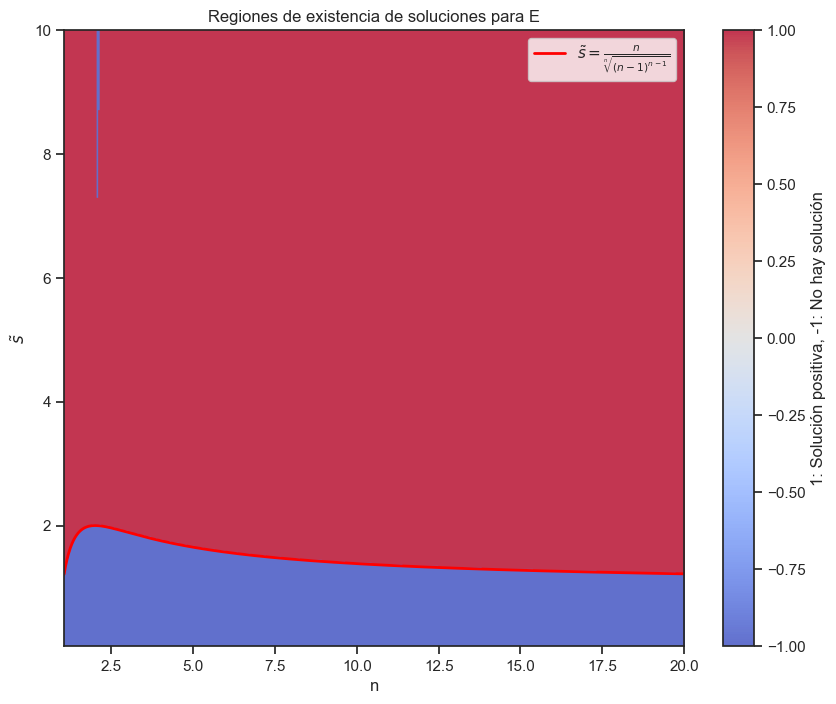

Soluciones positivas encontradas en 137159 puntos.
Soluciones negativas encontradas en 0 puntos.
Algunas posiciones de soluciones positivas:
s = 1.222, n = 1.050
s = 1.222, n = 19.763
s = 1.222, n = 19.810
s = 1.222, n = 19.858
s = 1.222, n = 19.905


In [5]:
tol = 1e-8  # Tolerancia para considerar que la solución es válida

def equation(E, s, n):
    return (s * E**(n-1) / (1 + E**n)) - 1

def find_solutions(s, n):
    """
    Busca soluciones de la ecuación para un par (s, n) usando varios puntos de inicio.
    Devuelve la primera solución positiva y/o negativa que encuentre, evitando repeticiones.
    """
    # Puntos de inicio (guesses) heurísticos
    E_guesses = [s/(s+1), -s/(s+1), 1.0, -1.0, 0.5, -0.5]
    pos_solution = None
    neg_solution = None

    for guess in E_guesses:
        sol = fsolve(equation, guess, args=(s, n))
        # Se verifica que el residual sea muy pequeño
        if abs(equation(sol[0], s, n)) < tol:
            if sol[0] > 0:
                if pos_solution is None or abs(sol[0] - pos_solution) > tol:
                    pos_solution = sol[0]
            elif sol[0] < 0:
                if neg_solution is None or abs(sol[0] - neg_solution) > tol:
                    neg_solution = sol[0]
    return pos_solution, neg_solution

def check_solutions(s_values, n_values):
    """
    Recorre los rangos de s y n y construye dos matrices:
      - solution_grid: codifica 1 (solución positiva), -2 (solución negativa) o -1 (sin solución).
      - solution_type_grid: etiqueta la solución encontrada.
    """
    solution_grid = np.full((len(s_values), len(n_values)), -1)  # -1: no hay solución
    solution_type_grid = np.full((len(s_values), len(n_values)), "No hay solución", dtype=object)
    
    for i, s in enumerate(s_values):
        for j, n in enumerate(n_values):
            pos_sol, neg_sol = find_solutions(s, n)
            if pos_sol is not None:
                solution_grid[i, j] = 1
                solution_type_grid[i, j] = "Solución positiva"
            elif neg_sol is not None:
                solution_grid[i, j] = -2
                solution_type_grid[i, j] = "Solución negativa"
    return solution_grid, solution_type_grid

# Definir rangos de parámetros:
# Queremos que el eje x sea n y el eje y sea s.
n_range = np.linspace(1.05, 20, 400)  
s_range = np.linspace(0.05, 10, 400)  
solutions, solution_types = check_solutions(s_range, n_range)

# Crear la gráfica usando imshow (ejes intercambiados: x -> n, y -> s)
plt.figure(figsize=(10, 8))
# La matriz 'solutions' tiene forma (len(s_range), len(n_range)), donde la fila corresponde a s y la columna a n.
plt.imshow(solutions, extent=[n_range.min(), n_range.max(), s_range.min(), s_range.max()],
           origin='lower', aspect='auto', cmap='coolwarm', alpha=0.8)
plt.colorbar(label='1: Solución positiva, -1: No hay solución')
plt.xlabel('n')
plt.ylabel(r'$\tilde{s}$')
plt.title('Regiones de existencia de soluciones para E')
n_curve = np.linspace(1.05, 20, 400)
s_curve = n_curve / ((n_curve - 1)**((n_curve - 1)/n_curve))
plt.plot(n_curve, s_curve, color='red', linewidth=2, label=r'$\tilde{s}=\frac{n}{\sqrt[n]{(n-1)^{n-1}}}$')
#plt.axvline(x=1, color='white', linestyle='--', linewidth=2, label="n=1")
plt.legend()
plt.show()

# Mostrar información de las soluciones encontradas
positive_positions = np.argwhere(solution_types == "Solución positiva")
negative_positions = np.argwhere(solution_types == "Solución negativa")

print(f"Soluciones positivas encontradas en {len(positive_positions)} puntos.")
print(f"Soluciones negativas encontradas en {len(negative_positions)} puntos.")

if len(positive_positions) > 0:
    print("Algunas posiciones de soluciones positivas:")
    for pos in positive_positions[:5]:
        # pos[0] corresponde al índice en s_range, pos[1] al índice en n_range
        print(f"s = {s_range[pos[0]]:.3f}, n = {n_range[pos[1]]:.3f}")

if len(negative_positions) > 0:
    print("Algunas posiciones de soluciones negativas:")
    for pos in negative_positions[:5]:
        print(f"s = {s_range[pos[0]]:.3f}, n = {n_range[pos[1]]:.3f}")

Ahora dividimos las regiones por número de soluciónes

/var/folders/kp/6z23sv5s1cb7rkrzzzslh1qc0000gn/T/ipykernel_11575/1047855795.py:4: RuntimeWarning: invalid value encountered in power
  return (s * E**(n-1) / (1 + E**n)) - 1
/var/folders/kp/6z23sv5s1cb7rkrzzzslh1qc0000gn/T/ipykernel_11575/3623210427.py:17: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  sol = fsolve(equation, E_guess, args=(s, n))[0]


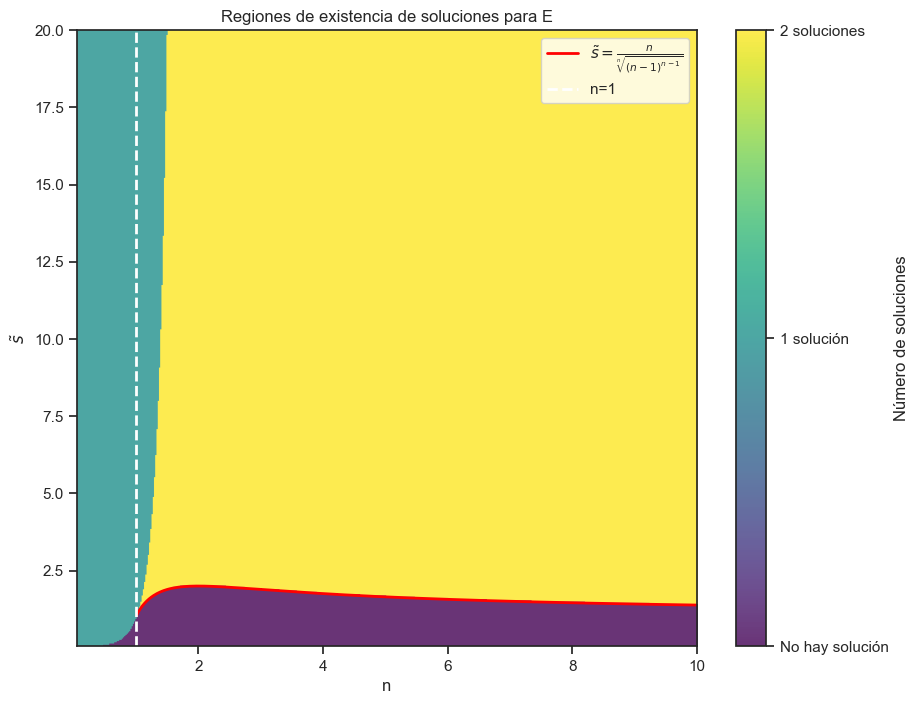

Casos con 0 soluciones: 18331
Casos con 1 solución: 32358
Casos con 2 soluciones: 199311


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

tol = 1e-6  # Tolerancia para validar la solución

def find_solutions(s, n, tol=tol):

    E_min, E_max = 1e-8, 50  # Ampliar el rango si es necesario
    E_grid = np.linspace(E_min, E_max, 3000)
    sols = []
    for i in range(len(E_grid)-1):
        f1 = equation(E_grid[i], s, n)
        f2 = equation(E_grid[i+1], s, n)
        if f1 * f2 < 0:
            E_guess = (E_grid[i] + E_grid[i+1]) / 2
            sol = fsolve(equation, E_guess, args=(s, n))[0]
            if sol > 0 and abs(equation(sol, s, n)) < tol:
                sols.append(sol)
    sols = np.unique(np.round(sols, decimals=8))
    sols = sorted(sols.tolist())
    if len(sols) > 2:
        sols = sols[:2]
    return sols

def check_solutions(n_values, s_values):

    solution_grid = np.full((len(s_values), len(n_values)), 0)
    solution_count_grid = np.zeros((len(s_values), len(n_values)))
    
    for j, s in enumerate(s_values):
        for i, n in enumerate(n_values):
            sols = find_solutions(s, n)
            num_sols = len(sols)
            solution_count_grid[j, i] = num_sols
            solution_grid[j, i] = num_sols
    return solution_grid, solution_count_grid

# Definir rangos de parámetros.
# Se define n_range para el eje x y s_range para el eje y.
n_range = np.linspace(0.05, 10, 500)  # eje x: n
s_range = np.linspace(0.05, 20, 500)    # eje y: \tilde{s}

solution_grid, solution_count_grid = check_solutions(n_range, s_range)

# Crear la gráfica de regiones
plt.figure(figsize=(10, 8))
# Como solution_grid tiene forma (len(s_range), len(n_range)), usaremos extent para:
# x: n_range, y: s_range.
plt.imshow(solution_grid, extent=[n_range.min(), n_range.max(), s_range.min(), s_range.max()],
           origin='lower', aspect='auto', cmap='viridis', alpha=0.8)
cbar = plt.colorbar()
cbar.set_label('Número de soluciones')
cbar.set_ticks([0, 1, 2])
cbar.set_ticklabels(['No hay solución', '1 solución', '2 soluciones'])
plt.xlabel('n')
plt.ylabel(r'$\tilde{s}$')
plt.title('Regiones de existencia de soluciones para E')

# Superponer la curva teórica para n > 1:
# \tilde{s} = n/((n-1)^((n-1)/n))
n_curve = np.linspace(1.01, 10, 500)
s_curve = n_curve / ((n_curve - 1)**((n_curve - 1)/n_curve))
plt.plot(n_curve, s_curve, color='red', linewidth=2, label=r'$\tilde{s}=\frac{n}{\sqrt[n]{(n-1)^{n-1}}}$')
plt.axvline(x=1, color='white', linestyle='--', linewidth=2, label="n=1")
plt.legend()
plt.show()

# Mostrar resumen de los casos encontrados:
print(f"Casos con 0 soluciones: {np.sum(solution_count_grid == 0)}")
print(f"Casos con 1 solución: {np.sum(solution_count_grid == 1)}")
print(f"Casos con 2 soluciones: {np.sum(solution_count_grid == 2)}")

Ahora solo una pequeña comparación usando el método de Newton para la encontrar las soluciones

/var/folders/kp/6z23sv5s1cb7rkrzzzslh1qc0000gn/T/ipykernel_11575/984932014.py:4: RuntimeWarning: invalid value encountered in scalar power
  return (s * E**(n-1) / (1 + E**n)) - 1
/var/folders/kp/6z23sv5s1cb7rkrzzzslh1qc0000gn/T/ipykernel_11575/984932014.py:7: RuntimeWarning: invalid value encountered in scalar power
  return s * ((n-1) * E**(n-2) * (1 + E**n) - n * E**(2*n-2)) / (1 + E**n)**2
/var/folders/kp/6z23sv5s1cb7rkrzzzslh1qc0000gn/T/ipykernel_11575/984932014.py:7: RuntimeWarning: overflow encountered in scalar power
  return s * ((n-1) * E**(n-2) * (1 + E**n) - n * E**(2*n-2)) / (1 + E**n)**2
/var/folders/kp/6z23sv5s1cb7rkrzzzslh1qc0000gn/T/ipykernel_11575/984932014.py:7: RuntimeWarning: overflow encountered in scalar multiply
  return s * ((n-1) * E**(n-2) * (1 + E**n) - n * E**(2*n-2)) / (1 + E**n)**2
/var/folders/kp/6z23sv5s1cb7rkrzzzslh1qc0000gn/T/ipykernel_11575/984932014.py:7: RuntimeWarning: invalid value encountered in scalar subtract
  return s * ((n-1) * E**(n-2) * (

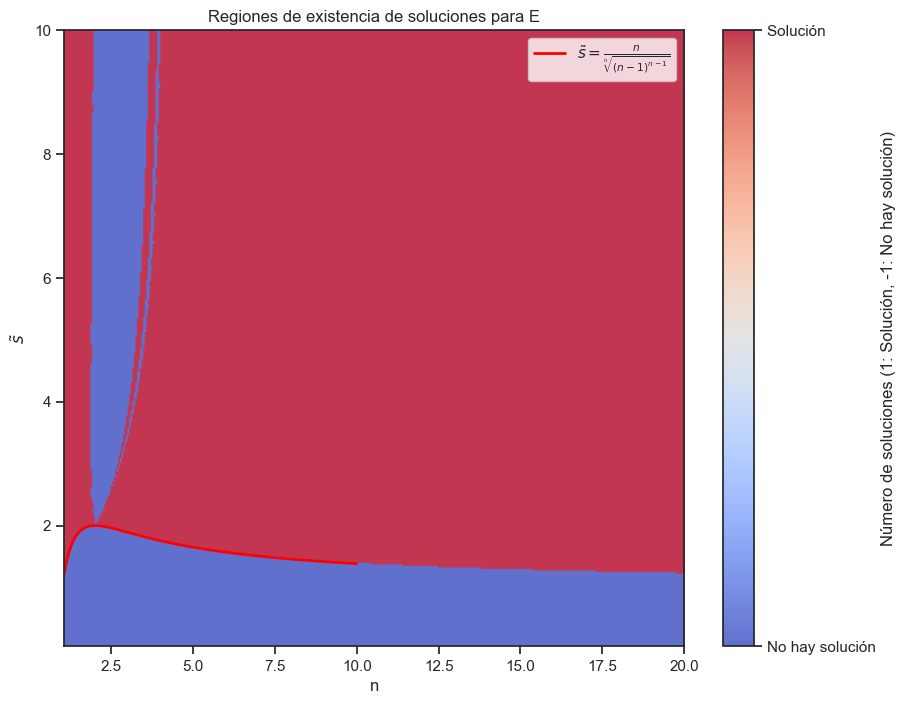

In [9]:
tol = 1e-6  # Tolerancia para validar la solución

def equation(E, s, n):
    return (s * E**(n-1) / (1 + E**n)) - 1

def equation_derivative(E, s, n):
    return s * ((n-1) * E**(n-2) * (1 + E**n) - n * E**(2*n-2)) / (1 + E**n)**2

def dynamic_initial_guess(s, n):
    if s < 1:
        return s / n  # Pequeño si s es pequeño
    elif s > 10:
        return 10 / s  # Disminuir si s es grande
    else:
        return 1  # Valor neutro para la mayoría de los casos

def find_solutions(s, n):
    E_guess = dynamic_initial_guess(s, n)
    try:
        E_positive = newton(equation, E_guess, fprime=equation_derivative, args=(s, n))
        if abs(equation(E_positive, s, n)) < tol and E_positive > 0:
            return E_positive
    except:
        pass
    return None

def check_solutions(s_values, n_values):

    # La matriz tendrá forma (# s, # n)
    solution_grid = np.full((len(s_values), len(n_values)), -1)  # -1 = No hay solución
    solution_type_grid = np.full((len(s_values), len(n_values)), "No hay solución", dtype=object)

    for i, s in enumerate(s_values):
        for j, n in enumerate(n_values):
            pos_sol = find_solutions(s, n)
            if pos_sol is not None:
                solution_grid[i, j] = 1  # Solución positiva
                solution_type_grid[i, j] = "Solución positiva"

    return solution_grid, solution_type_grid

# Definir rangos de parámetros:
# Eje x: n; eje y: s (o \tilde{s})
n_range = np.linspace(1.05, 20, 400)  
s_range = np.linspace(0.05, 10, 400)  

solutions, solution_types = check_solutions(s_range, n_range)

# Crear la gráfica de regiones.
plt.figure(figsize=(10, 8))
# La matriz solutions tiene forma (# s, # n) => filas: s, columnas: n.
plt.imshow(solutions, extent=[n_range.min(), n_range.max(), s_range.min(), s_range.max()],
           origin='lower', aspect='auto', cmap='coolwarm', alpha=0.8)
cbar = plt.colorbar()
cbar.set_label('Número de soluciones (1: Solución, -1: No hay solución)')
cbar.set_ticks([-1, 1])
cbar.set_ticklabels(['No hay solución', 'Solución '])
plt.xlabel('n')
plt.ylabel(r'$\tilde{s}$')
plt.title('Regiones de existencia de soluciones para E')
# Superponer la curva teórica para n > 1:
# \tilde{s} = n/((n-1)^((n-1)/n))
n_curve = np.linspace(1.05, 10, 300)
s_curve = n_curve / ((n_curve - 1)**((n_curve - 1)/n_curve))
plt.plot(n_curve, s_curve, color='red', linewidth=2, label=r'$\tilde{s}=\frac{n}{\sqrt[n]{(n-1)^{n-1}}}$')
#plt.axvline(x=1, color='white', linestyle='--', linewidth=2, label="n=1")
plt.legend()
plt.show()


## Estabilidad

Ahora vamos a comprobar las condiciónes de estabilidad que encontramos algebraicamente, además de ver gráficamente que esta combinación de parametros tiene una separatriz que divide la convergencia al equilibrio ó la extinción de las celulas efectoras

Un punto de equilibrio encontrado: E_m1 = 1.6180
Autovalores en E_m1: [-0.0118034  -0.42705099]


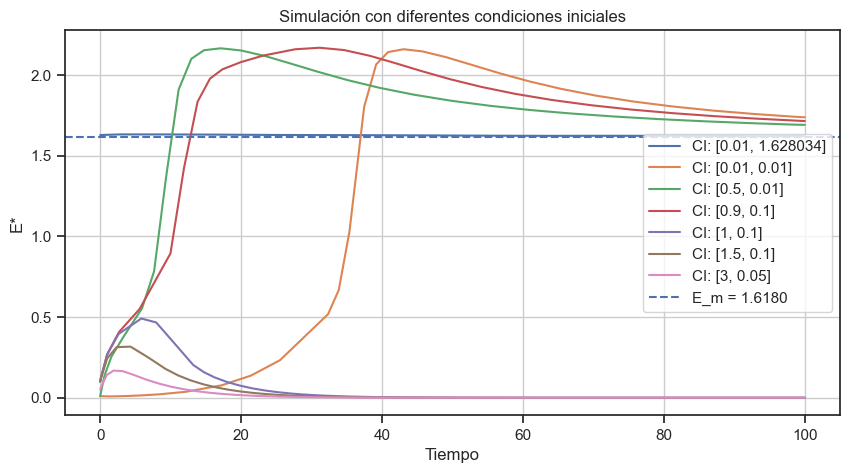

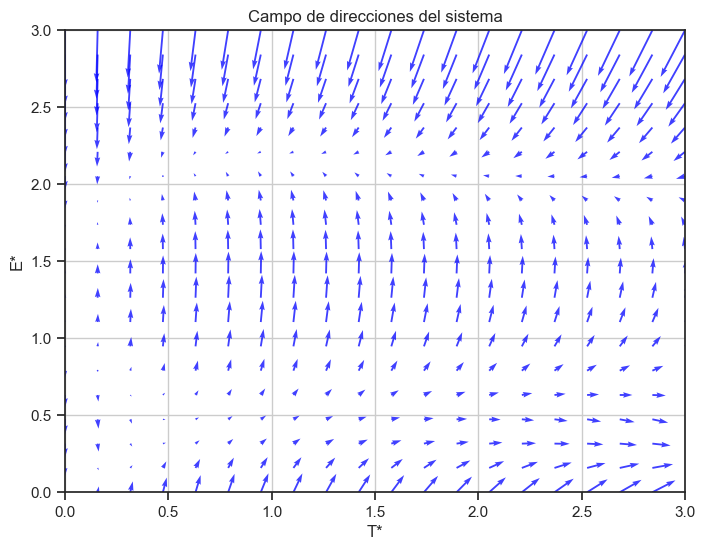

In [20]:
# Parámetros del modelo 
r_tilde = 0.15
k_tilde = 0.1
p_tilde = 0.7
s_tilde = 2
u = 1
v = 2
n = 3

np.set_printoptions(legacy='1.25') #Para cambiar el formato en el que aparecen los valores en la gráfica

# Función para encontrar los puntos de equilibrio E_m
def equation_Em(E, s_tilde, n):
    return s_tilde * (E ** (n - 1)) / (1 + E ** n) - 1

# Intentar encontrar múltiples soluciones
initial_guesses = [0.1, 2]
sols = [root(lambda E: equation_Em(E, s_tilde, n), guess) for guess in initial_guesses]
E_m_values = sorted(set(round(sol.x[0], 6) for sol in sols if sol.success))

# Mostrar soluciones encontradas
if len(E_m_values) == 2:
    E_m1, E_m2 = E_m_values
    print(f"Dos puntos de equilibrio encontrados: E_m1 = {E_m1:.4f}, E_m2 = {E_m2:.4f}")
elif len(E_m_values) == 1:
    E_m1 = E_m_values[0]
    print(f"Un punto de equilibrio encontrado: E_m1 = {E_m1:.4f}")
else:
    print("No se encontraron soluciones reales para E_m.")

# Definir el Jacobiano
def jacobian(T_star, E_star):
    df1_dT = r_tilde - k_tilde * E_star
    df1_dE = -k_tilde * T_star
    df2_dT = p_tilde * u * T_star ** (u - 1) if T_star > 0 else 0
    df2_dE = s_tilde * (n * E_star ** (n - 1) * (1 + E_star ** n) - n * E_star ** (n - 1) * E_star ** n) / (1 + E_star ** n) ** 2 - 1
    return np.array([[df1_dT, df1_dE], [df2_dT, df2_dE]])

# Evaluación del Jacobiano en los puntos de equilibrio
for i, E_m in enumerate(E_m_values):
    J = jacobian(0, E_m)
    eigenvalues = np.linalg.eigvals(J)
    print(f"Autovalores en E_m{i+1}: {eigenvalues}")

# Definir el sistema dinámico
def system(t, y):
    T_star, E_star = y
    dTdt = r_tilde * T_star - k_tilde * T_star * E_star
    dEdt = p_tilde * (T_star ** u) / (1 + T_star ** v) + s_tilde * (E_star ** n) / (1 + E_star ** n) - E_star
    return [dTdt, dEdt]

# Simulación con múltiples condiciones iniciales
t_span = (0, 100)
initial_conditions = [[0.01, E_m_values[0] + 0.01], [0.01, 0.01],[0.5,0.01],[0.9,0.1],[1,0.1] ,[1.5, 0.1] ,[3, 0.05]]  

plt.figure(figsize=(10, 5))
for y0 in initial_conditions:
    sol = solve_ivp(system, t_span, y0, method='RK45', dense_output=True)
    plt.plot(sol.t, sol.y[1], label=f'CI: {y0}')

for E_m in E_m_values:
    plt.axhline(E_m, linestyle='--', label=f'E_m = {E_m:.4f}')

plt.xlabel('Tiempo')
plt.ylabel('E*')
plt.title('Simulación con diferentes condiciones iniciales')
plt.legend()
plt.grid()
plt.show()

# Definir el campo de direcciones
T_vals = np.linspace(0, 3, 20)
E_vals = np.linspace(0, 3, 20)
T, E = np.meshgrid(T_vals, E_vals)
dT, dE = system(0, [T, E])

plt.figure(figsize=(8, 6))
plt.quiver(T, E, dT, dE, color='blue', alpha=0.75)
plt.xlabel('T*')
plt.ylabel('E*')
plt.xlim([0, 3])
plt.ylim([0, 3])
plt.title('Campo de direcciones del sistema')
plt.grid()
plt.show()